# Overview:

## Random network
sequence = nx.random_powerlaw_tree_sequence(100, tries=5000)

G = nx.configuration_model(sequence)

## Assignment objective: 
- show empirically how close to expectation the real network generated from the White Helmets dataset is compared to a baseline model
- compare the characteristics of the network extracted from the White Helmets dataset described in the first lecture with the expected characteristics of a “regular” network generated using some classical network generation models.
- Choose and justify your choice for at least 5 network metrics
- Choose at least two generative network models to compare against. Justify your choice. 
- Via empirical evaluation, make the case that the network structures from the White Helmets dataset are expected/unexpected (with an attempt to distinguish between organic and coordinated behaviour)

## Dataset
- The dataset has the following format:
<videoID>, <userID_1>, <userID_2>, <timestamp_1>, <timestamp_2>
- where the posts by userID_1 and userID_2 are within 52 seconds of each others and both contain a link to the same videoID. 
- timestamp_1 is the time when userID_1 posted the url to videoID, timestamp_2 is the time when userID_2 posted the same url.

# Metrics:

## Chosen metrics and reasons for choosing theses metrics:
- Clustering Coefficient
    → Measures how likely it is that two neighbors of a node are also connected.
    Rationale: Coordinated campaigns often form tightly connected groups that amplify similar narratives. Random networks usually have low clustering, so higher values indicate non-random coordination.

- Modularity
    → Quantifies the presence of distinct communities within the network.
    Rationale: Influence operations typically involve groups of accounts promoting similar messages. High modularity compared to a random baseline suggests organized, topic-based coordination.

- Degree Assortativity
    → Captures whether nodes of similar degree tend to connect with each other.
    Rationale: Coordinated networks often display unusual degree correlations (e.g., central “hub” accounts linked to many smaller ones). Deviations from randomness reveal hierarchical or controlled connectivity.

- Betweenness Centrality
    → Measures how frequently a node appears on the shortest paths between others.
    Rationale: Cross-platform actors who bridge YouTube, Twitter, and Facebook tend to have high betweenness. This highlights key agents coordinating dissemination across platforms.

- Degree Distribution
    → Describes how many links each node has.
    Rationale: Random networks tend to have homogeneous degree patterns. Real disinformation networks often exhibit heavy-tailed distributions with dominant hubs — evidence of intentional amplification.

# Networks:

## Reason for comparing real networks with random networks:
Comparing two complete different types of random/baseline networks with the real network to see which structures and properties in the real network are not random.
- Which properties of the real network are statistically significant and which properties are occurring also in random networks
- If a real network, for example, has a much higher clustering than a random network of the same density → indication of community structures or local organization.
- Evaluating the benefits of a real network in comparison to a random network

## Chosen random networks:
- Watts-Strogatz graph/Small world -> low average path length and high Clustering coefficient -> random restructuring of edges
- Barabasi-Albert model -> Scale-free network -> Creating Hub -> More connections/edges

Loading networks...
Computing metrics for Real Network...
Real Network:
  Average Clustering Coefficient: 0.2928
  Modularity: 0.9958
  Degree Assortativity: 0.8600
  Average Betweenness Centrality: 0.0000
  Degree Distribution: Counter({1: 1835, 2: 1174, 3: 593, 4: 305, 5: 114, 6: 41, 7: 36, 8: 22, 9: 6})

Computing metrics for Watts-Strogatz...
Watts-Strogatz:
  Average Clustering Coefficient: 0.3701
  Modularity: 0.8780
  Degree Assortativity: -0.0229
  Average Betweenness Centrality: 0.0024
  Degree Distribution: Counter({4: 2887, 3: 607, 5: 546, 6: 53, 2: 29, 7: 3, 8: 1})

Computing metrics for Barabasi-Albert...
Barabasi-Albert:
  Average Clustering Coefficient: 0.0101
  Modularity: 0.5333
  Degree Assortativity: -0.0627
  Average Betweenness Centrality: 0.0009
  Degree Distribution: Counter({2: 2067, 3: 847, 4: 357, 5: 263, 6: 152, 7: 95, 8: 70, 9: 58, 10: 34, 11: 28, 12: 27, 15: 14, 13: 13, 16: 11, 14: 10, 18: 9, 19: 8, 17: 7, 24: 6, 20: 5, 26: 4, 23: 4, 29: 3, 22: 3, 31: 3, 39

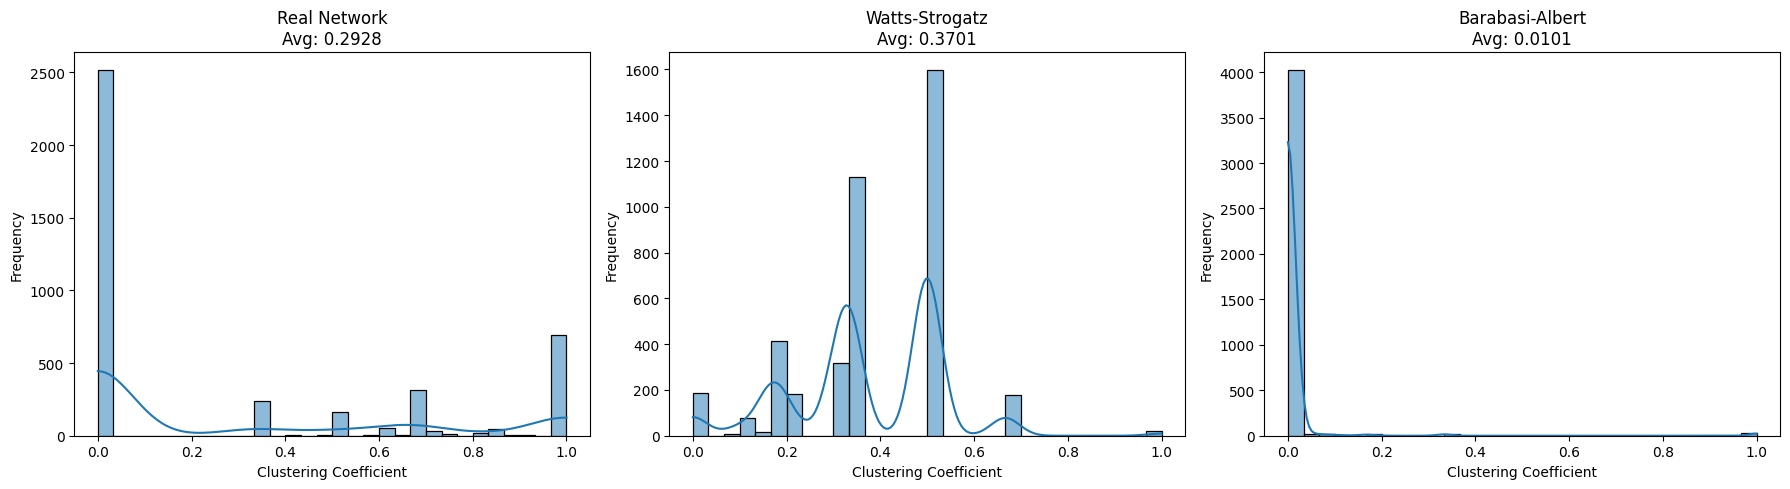


--- Modularity Comparison ---


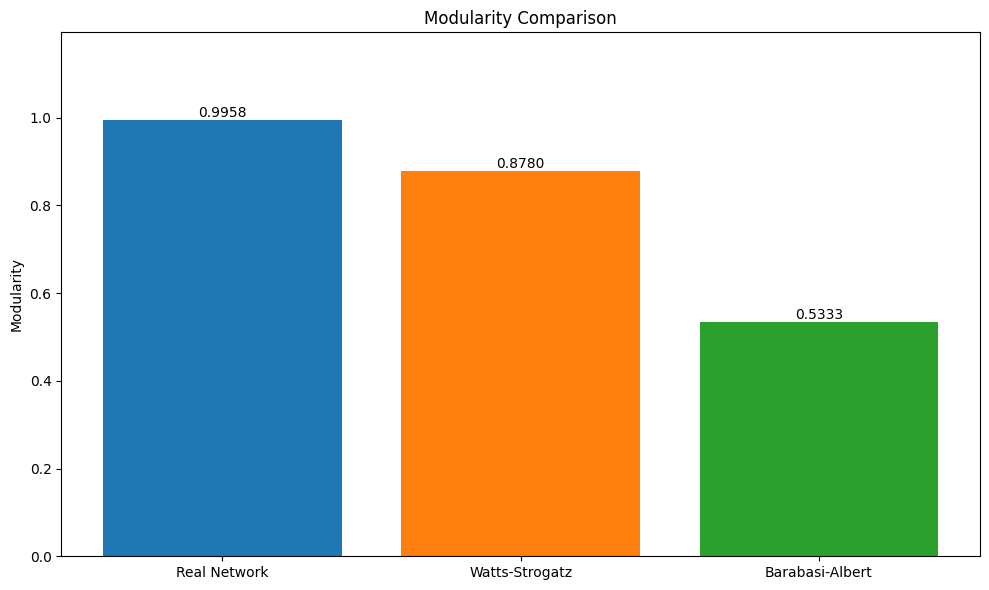


--- Degree Assortativity Comparison ---


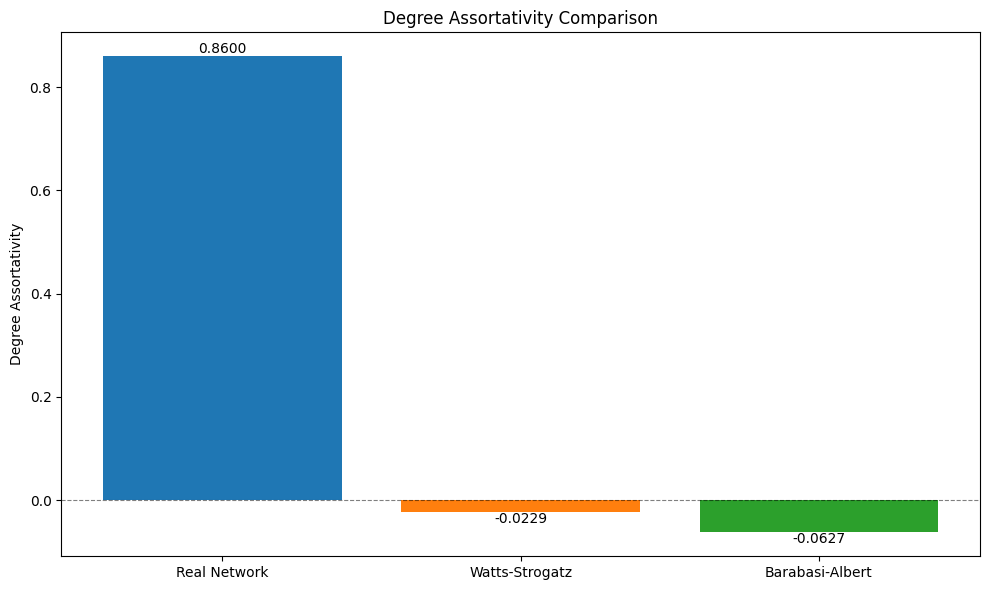


--- Betweenness Centrality Comparison ---


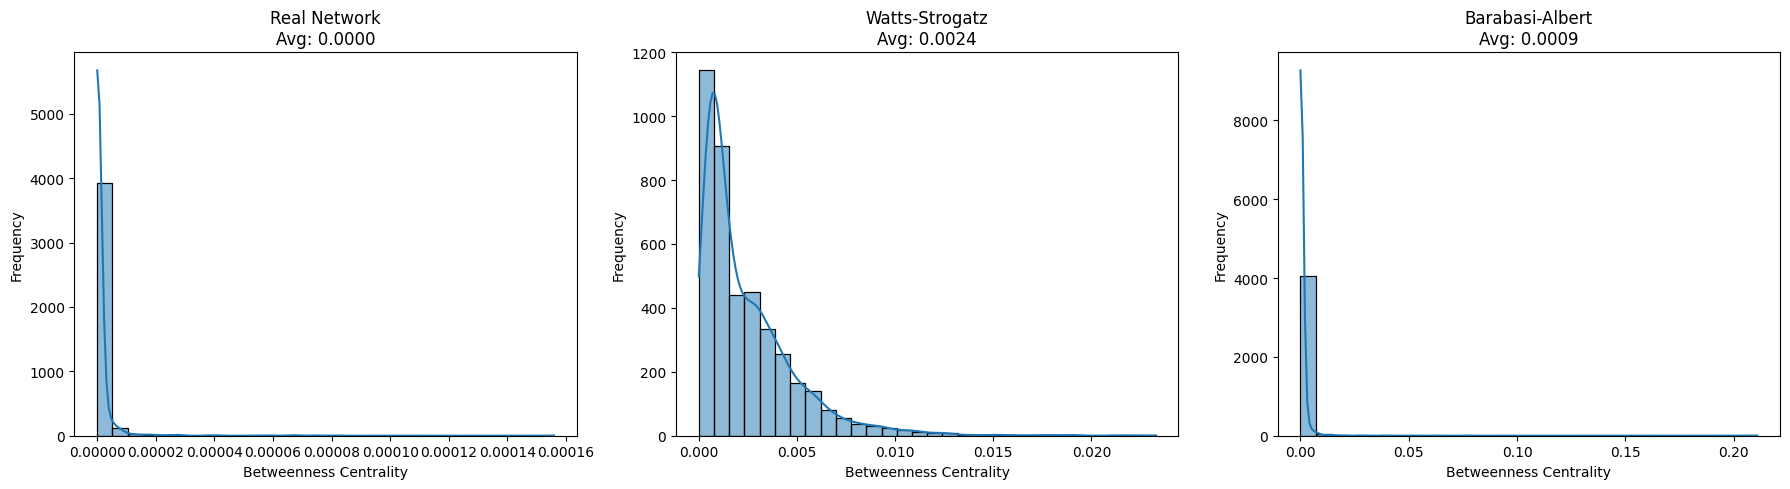


--- Degree Distribution Comparison ---


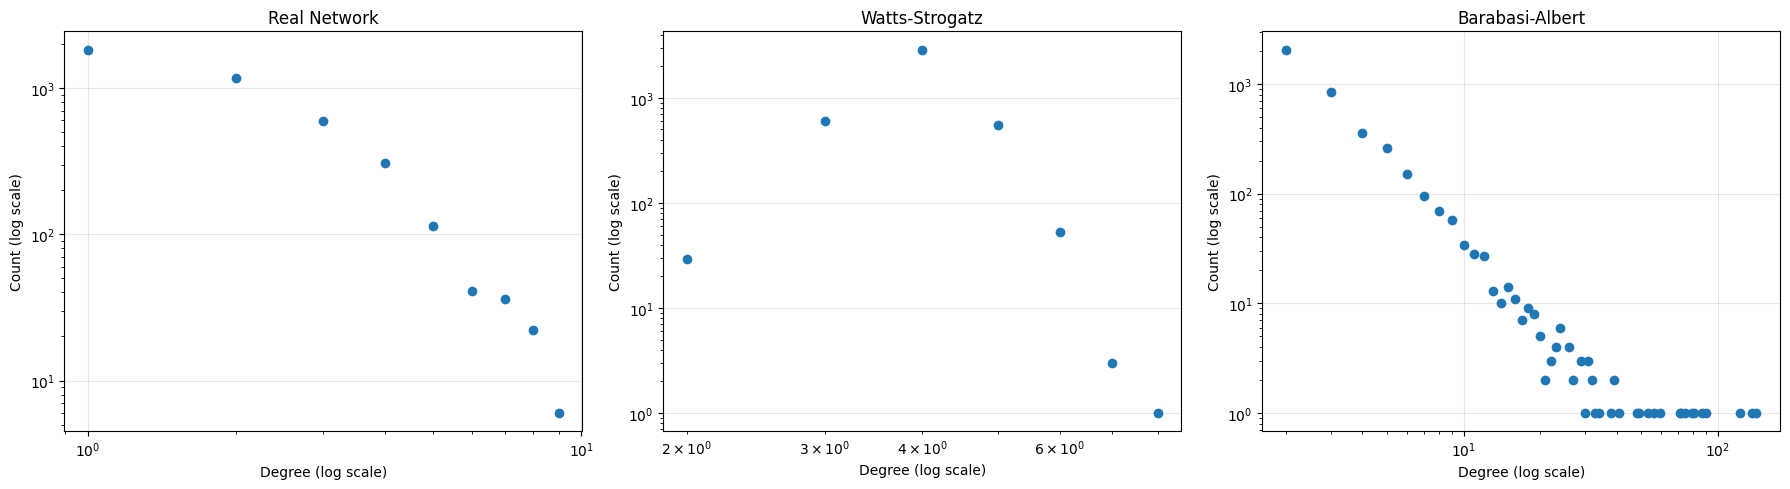

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import community as community_louvain



def generate_watts_strogatz_graph(n, k, p):
    return nx.watts_strogatz_graph(n, k, p)

def generate_barabasi_albert_graph(n, m):
    return nx.barabasi_albert_graph(n, m)

def calculate_clustering_coefficient(G):
    return nx.average_clustering(G)

def calculate_modularity(G, partition):
    return community_louvain.modularity(partition, G)

def calculate_degree_assortativity(G):
    return nx.degree_assortativity_coefficient(G)

def calculate_betweenness_centrality(G):
    return nx.betweenness_centrality(G)

def calculate_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    return Counter(degree_sequence)

# Analysis function to compute all metrics
def compute_network_metrics(G, network_name):
    """Compute all metrics for a network without plotting"""
    print(f"Computing metrics for {network_name}...")
    
    metrics = {}
    
    # Clustering Coefficient
    metrics['clustering_values'] = list(nx.clustering(G).values())
    metrics['avg_clustering'] = calculate_clustering_coefficient(G)
    
    # Modularity
    partition = community_louvain.best_partition(G)
    metrics['modularity'] = calculate_modularity(G, partition)
    
    # Degree Assortativity
    metrics['degree_assortativity'] = calculate_degree_assortativity(G)
    
    # Betweenness Centrality
    betweenness_dict = calculate_betweenness_centrality(G)
    metrics['betweenness_values'] = list(betweenness_dict.values())
    metrics['avg_betweenness'] = np.mean(metrics['betweenness_values'])
    
    # Degree Distribution
    metrics['degree_count'] = calculate_degree_distribution(G)
    
    return metrics

# Plotting functions for side-by-side comparison
def plot_clustering_comparison(metrics_dict):
    """Plot clustering coefficient distributions side by side"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (network_name, metrics) in enumerate(metrics_dict.items()):
        sns.histplot(metrics['clustering_values'], bins=30, kde=True, ax=axes[idx])
        axes[idx].set_title(f"{network_name}\nAvg: {metrics['avg_clustering']:.4f}")
        axes[idx].set_xlabel('Clustering Coefficient')
        axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def plot_modularity_comparison(metrics_dict):
    """Plot modularity comparison as bar chart"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    networks = list(metrics_dict.keys())
    modularity_values = [metrics['modularity'] for metrics in metrics_dict.values()]
    
    bars = ax.bar(networks, modularity_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    ax.set_ylabel('Modularity')
    ax.set_title('Modularity Comparison')
    ax.set_ylim(0, max(modularity_values) * 1.2)
    
    # Add value labels on bars
    for bar, value in zip(bars, modularity_values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.4f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def plot_degree_assortativity_comparison(metrics_dict):
    """Plot degree assortativity comparison as bar chart"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    networks = list(metrics_dict.keys())
    assortativity_values = [metrics['degree_assortativity'] for metrics in metrics_dict.values()]
    
    bars = ax.bar(networks, assortativity_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    ax.set_ylabel('Degree Assortativity')
    ax.set_title('Degree Assortativity Comparison')
    ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    
    # Add value labels on bars
    for bar, value in zip(bars, assortativity_values):
        height = bar.get_height()
        y_pos = height if height > 0 else height
        va = 'bottom' if height > 0 else 'top'
        ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{value:.4f}',
                ha='center', va=va)
    
    plt.tight_layout()
    plt.show()

def plot_betweenness_comparison(metrics_dict):
    """Plot betweenness centrality distributions side by side"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (network_name, metrics) in enumerate(metrics_dict.items()):
        sns.histplot(metrics['betweenness_values'], bins=30, kde=True, ax=axes[idx])
        axes[idx].set_title(f"{network_name}\nAvg: {metrics['avg_betweenness']:.4f}")
        axes[idx].set_xlabel('Betweenness Centrality')
        axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def plot_degree_distribution_comparison(metrics_dict):
    """Plot degree distributions side by side on log-log scale"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (network_name, metrics) in enumerate(metrics_dict.items()):
        degree_count = metrics['degree_count']
        degrees, counts = zip(*sorted(degree_count.items()))
        axes[idx].loglog(degrees, counts, marker='o', linestyle='None')
        axes[idx].set_title(f"{network_name}")
        axes[idx].set_xlabel('Degree (log scale)')
        axes[idx].set_ylabel('Count (log scale)')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def compare_networks(networks_dict):
    """
    Compare multiple networks with side-by-side plots
    networks_dict: dictionary with network names as keys and NetworkX graphs as values
    """
    # Compute metrics for all networks
    metrics_dict = {}
    for network_name, G in networks_dict.items():
        metrics_dict[network_name] = compute_network_metrics(G, network_name)
        print(f"{network_name}:")
        print(f"  Average Clustering Coefficient: {metrics_dict[network_name]['avg_clustering']:.4f}")
        print(f"  Modularity: {metrics_dict[network_name]['modularity']:.4f}")
        print(f"  Degree Assortativity: {metrics_dict[network_name]['degree_assortativity']:.4f}")
        print(f"  Average Betweenness Centrality: {metrics_dict[network_name]['avg_betweenness']:.4f}")
        print(f"  Degree Distribution: {metrics_dict[network_name]['degree_count']}")
        print()
    
    # Plot comparisons
    print("\n--- Clustering Coefficient Comparison ---")
    plot_clustering_comparison(metrics_dict)
    
    print("\n--- Modularity Comparison ---")
    plot_modularity_comparison(metrics_dict)
    
    print("\n--- Degree Assortativity Comparison ---")
    plot_degree_assortativity_comparison(metrics_dict)
    
    print("\n--- Betweenness Centrality Comparison ---")
    plot_betweenness_comparison(metrics_dict)
    
    print("\n--- Degree Distribution Comparison ---")
    plot_degree_distribution_comparison(metrics_dict)

####################  
# Load real network from White Helmets dataset
def load_real_network(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 7:
                user1, user2 = parts[2], parts[3]
                G.add_edge(user1, user2)
    return G

# Creating random networks

# Creating WS model
def create_ws_model(n, k, p):
    return nx.watts_strogatz_graph(n, k, p)

# Creating BA model
def create_ba_model(n, m):
    return nx.barabasi_albert_graph(n, m)

# Main analysis
print("Loading networks...")
real_network = load_real_network('data/pairwise_52seconds_share.csv')
ws_network = create_ws_model(real_network.number_of_nodes(), 4, 0.1) # parameters: n = number of nodes, k = number of nearest neighbors, p = probability of rewiring
ba_network = create_ba_model(real_network.number_of_nodes(), 2) # parameter: n = number of nodes, m = number of edges to attach from a new node to existing nodes

# Create dictionary of networks
networks = {
    "Real Network": real_network,
    "Watts-Strogatz": ws_network,
    "Barabasi-Albert": ba_network
}

# Compare all networks
compare_networks(networks)


# Evaluation of results



Thanks to these metrics we can compare the 3 graphs and understand the specifities of the White Helmet dataset. 
First by comparing the average clustering coefficient between these. We see that the White Helmet (WH) has a average CC of 0.2928 whereas the BA is much lower at 0.01 and the WS is higher at 0.3701. With this we can see that the WH graph has a community like organization, but not to like a in a small world network, because we can see that the WS has a higher CC. 
If we look at the modularity, we can see that WH has a really high modularity of 0.9958. This translates to high concentrated groups in the graph without lot of connection to one another. At the opposite the synthetic graphs have much lower modularity.
The degree assortativity is also usefull here to understand how the WH organization works. We can see that WH is the only graph with a positive assortativity of 0.860, against -0.0229 for WS and -0.0627 for BA. So nodes in the WH graph tend to only connect to similar nodes, whereas natural networks tends to be neutral or dissortative. High assortativity combined with high modularity often signals homophily or echo chambers.  
When we look at betweeness centrality, the WH stands out again because it has no nodes acting as bridges. In organic or random networks, a few nodes usually connect different communities. This supports the idea that the WH communities are highly insulated or operate in isolation, again consistent with coordinated campaigns that don’t rely on a few central disseminators. 
The real network’s degree distribution has many nodes with very few connections, but no extreme hubs. This would mean that the network is not scale-free.

Thanks to all these metrics we can understand how the information campaign happened. The WH network is not a natural random network. It does not translate to a Small World situation, is highly concentrated in groups that seems independant on the network. So we can see that this whole graph is organized, but not throught indivuduals in it, but by a decentralised strategy. Each group serves as an proxy to spread the information campaign


# Does the analysis make the case of organic/inorganic patterns?